In [1]:
from nn import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("digit_data.csv")

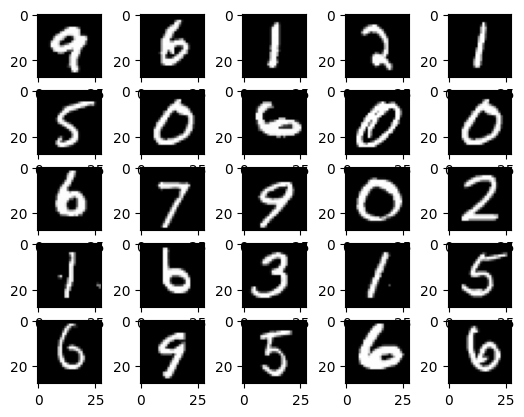

In [3]:
def plot_digits(digits):
    for i, pixels in enumerate(digits.iloc):
        plt.subplot(5,5,i+1)
        plt.imshow(pixels[1:].to_numpy().reshape(28,28), cmap='gray')
        
plot_digits(data.iloc[np.random.randint(0, data.shape[0], (25,))])

In [4]:
data = data.to_numpy()
np.random.shuffle(data)

X = data[:, 1:] / data[:, 1:].max()
y = data[:, 0]
target = np.zeros((y.shape[0], y.max()+1))

for i, row in enumerate(target):
    row[y[i]] = 1
    
y = target
print(X.shape, y.shape)
x_train, y_train, x_test, y_test = X[:40000].T, y[:40000].T, X[40000:].T, y[40000:].T
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(42000, 784) (42000, 10)
(784, 40000) (10, 40000) (784, 2000) (10, 2000)


In [20]:
model = Model(categorical_cross_entropy)
model.add_layer(Layer(784, 100, activation=tanh, keep_prob=0.9))
model.add_layer(Layer(100, 10, activation=softmax))

In [21]:
model.fit(x_train, y_train, iter=100, lr=0.2, val_set=[x_test, y_test])

epoch: 1/100	loss: 2.303998030047849	accuracy:0.1873	val_loss: 2.2754913122601694	val_accuracy: 0.193
epoch: 2/100	loss: 2.279553419295459	accuracy:0.292825	val_loss: 2.2464644195803696	val_accuracy: 0.3045
epoch: 3/100	loss: 2.249946037363083	accuracy:0.388875	val_loss: 2.2182190459625817	val_accuracy: 0.388
epoch: 4/100	loss: 2.2239872993873355	accuracy:0.476725	val_loss: 2.188289383783705	val_accuracy: 0.4915
epoch: 5/100	loss: 2.2033792744165948	accuracy:0.541075	val_loss: 2.1570994857248627	val_accuracy: 0.5525
epoch: 6/100	loss: 2.167124809123818	accuracy:0.5952	val_loss: 2.12354047939681	val_accuracy: 0.6075
epoch: 7/100	loss: 2.135097671013868	accuracy:0.631325	val_loss: 2.087801142965416	val_accuracy: 0.642
epoch: 8/100	loss: 2.1071889493140925	accuracy:0.659525	val_loss: 2.0499182106481912	val_accuracy: 0.672
epoch: 9/100	loss: 2.080994546929428	accuracy:0.67815	val_loss: 2.0095333197818475	val_accuracy: 0.6855
epoch: 10/100	loss: 2.025115143768482	accuracy:0.691875	val_loss:

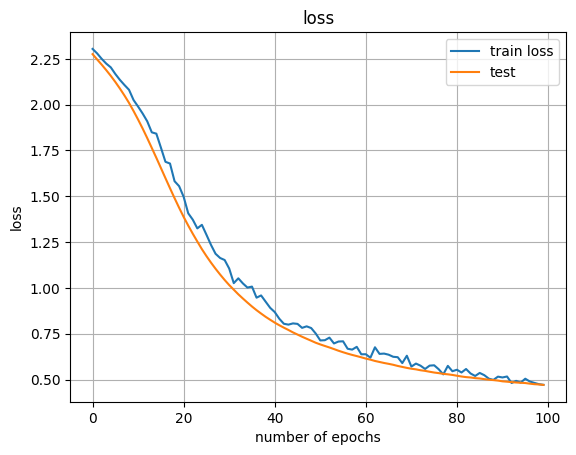

In [29]:
plt.plot(model.loss_log, label='train loss')
plt.plot(model.val_loss_log, label='test')

plt.title("loss")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.grid()
plt.legend()

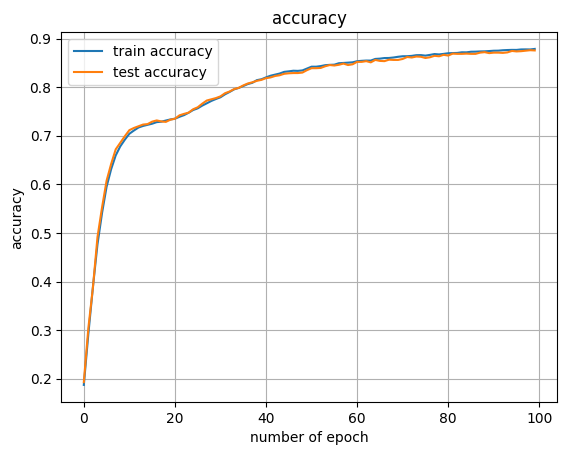

In [30]:
plt.plot(model.accuracy_log, label="train accuracy")
plt.plot(model.val_accuracy_log, label="test accuracy")
plt.title("accuracy")
plt.legend()
plt.xlabel("number of epoch")
plt.ylabel("accuracy")
plt.grid()